# Lab 9 - Time Series
## Geleshko Dmytro
## 
## Theory
Часовий ряд (англ. time series) — це ряд точок даних, проіндексованих (або перелічених, або відкладених на графіку) в хронологічному порядку. Найчастіше часовий ряд є послідовністю, взятою на рівновіддалених точках в часі, які йдуть одна за одною. Таким чином, він є послідовністю даних дискретного часу. Прикладами часових рядів є висоти океанських припливів, кількості сонячних плям, та щоденне середньозважене значення індексу ПФТС на момент закриття торгів.

Аналіз часових рядів (англ. time series analysis) включає методи аналізу даних часових рядів з метою витягування значимих статистик та інших характетистик даних. Прогнозування часових рядів (англ. time series forecasting) — це застосування моделі для передбачування майбутніх значень на основі значень попередньо спостережених. І хоча регресійний аналіз часто застосовують для перевірки теорій про те, що поточні значення одного чи більше незалежних часових рядів впливають на поточне значення іншого часового ряду, цей тип аналізу часових рядів не називають «аналізом часових рядів», який натомість зосереджується на порівнянні значень одного часового ряду або багатьох залежних часових рядів у різні моменти часу.

Три широкі класи, що становлять практичний інтерес при моделюванні змін рівня якогось процесу, складають авторегресійні моделі (англ. autoregressive models, AR models), інтегровані моделі (англ. integrated models, I models) та моделі ковзного середнього (англ. moving average models, MA models). Ці три класи залежать від попередніх точок даних лінійно. Поєднання цих ідей дає модель авторегресії — ковзного середнього (англ. autoregressive–moving-average model, ARMA model) та модель авторегресії — інтегрованого ковзного середнього (англ. autoregressive integrated moving average model, ARIMA model).
## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import warnings
#warnings.filterwarnings('ignore')

## Data

In [2]:
df = pd.read_csv("temperature_data.csv", usecols=["dt", "LandAverageTemperature"])
df.rename(columns={"dt":"date", "LandAverageTemperature":"temp"}, inplace=True)
df["date"] = pd.to_datetime(df["date"])
df = df.loc[df['date'] >= "1915-01-01"].loc[::12,:]
df.set_index('date', inplace=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)
df

,temp
1915-01-01,2.299
1916-01-01,2.616
1917-01-01,2.133
1918-01-01,1.934
1919-01-01,2.184
...,...
2011-01-01,3.282
2012-01-01,3.157
2013-01-01,3.685
2014-01-01,3.732


<AxesSubplot:>

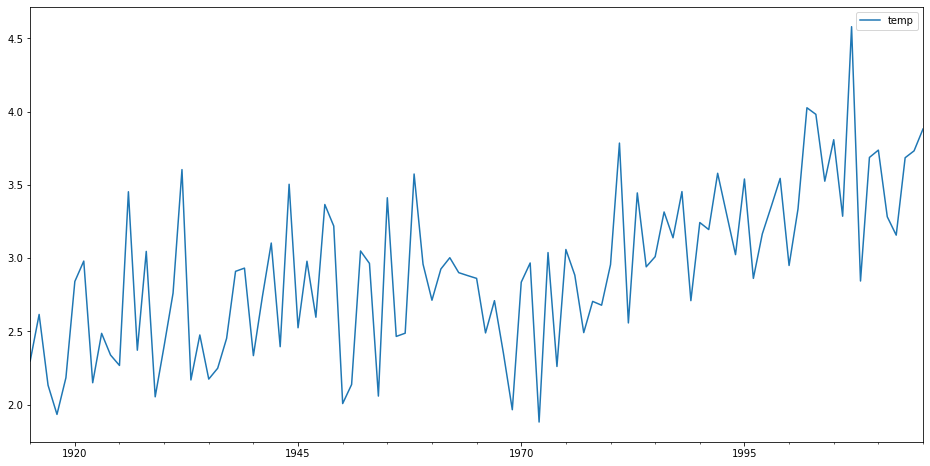

In [3]:
plt.rcParams["figure.figsize"] = (16,8)
df.plot()

## Predicting

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

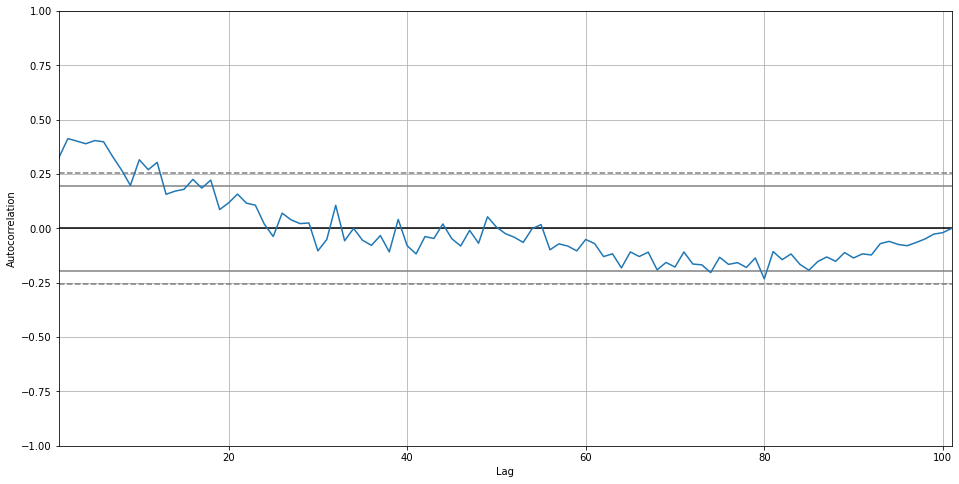

In [4]:
pd.plotting.autocorrelation_plot(df)

<AxesSubplot:>

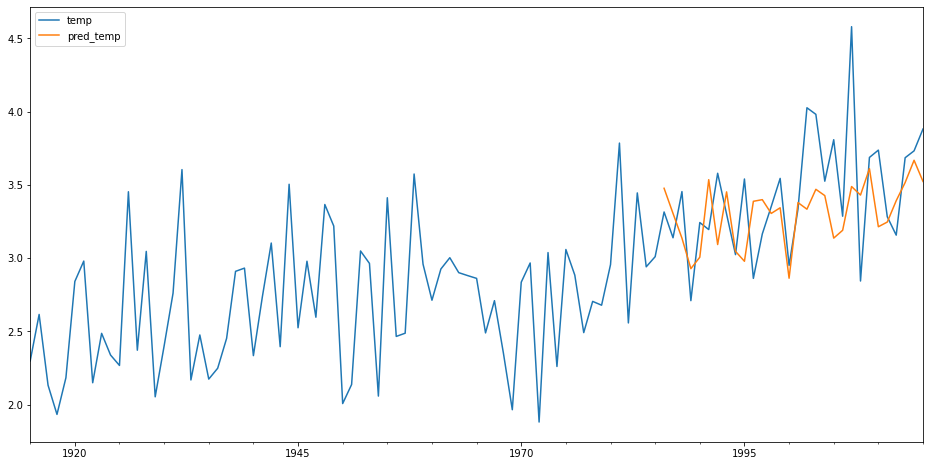

In [5]:
model = ARIMA(df['temp'], order=(15, 3, 15))
model_fit = model.fit()
df['pred_temp'] = model_fit.predict(start=-30, dynamic=True)
df[['temp','pred_temp']].plot()

In [6]:
err = mean_absolute_error(df["temp"].values[-30:],df["pred_temp"].values[-30:])
print("Mean error:", err)

Mean error: 0.30018852164540294


In [7]:
print("Error with regard to actual data:", err*100/df["temp"].values[-30:].mean())

Error with regard to actual data: 8.750236253133133


## Results
В результаті виконання лабораторної роботи було побудовано модель передбачення для даних середньої температури Землі за останні 100 років. Дані були завантажені, перетворені та проаналізовані на кореляцію. На основі отриманих знань та за допомогою тестувань було визначено параметри для побудови моделі передбачення (15-лаг, 3-ріст, 15-ма). Середня похибка складає 0.3 градуси або 8.75%.